In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import time
import seaborn as sns

In [20]:
%matplotlib inline

In [3]:
import tensorflow as tf

2024-07-21 11:24:55.891672: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 11:24:55.891836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 11:24:56.110666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
file_path = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/'

train = pd.read_csv(file_path + 'train.csv')
label = pd.read_csv(file_path + 'train_label_coordinates.csv')
train_ser = pd.read_csv(file_path + 'train_series_descriptions.csv')
test_ser = pd.read_csv(file_path + 'test_series_descriptions.csv')
sub = pd.read_csv(file_path + 'sample_submission.csv')

In [5]:
train.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [6]:
label.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [7]:
train_ser.head()

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


In [8]:
test_ser.head()

,study_id,series_id,series_description
0,44036939,2828203845,Sagittal T1
1,44036939,3481971518,Axial T2
2,44036939,3844393089,Sagittal T2/STIR


In [9]:
sub.head()

,row_id,normal_mild,moderate,severe
0,44036939_left_neural_foraminal_narrowing_l1_l2,0.333333,0.333333,0.333333
1,44036939_left_neural_foraminal_narrowing_l2_l3,0.333333,0.333333,0.333333
2,44036939_left_neural_foraminal_narrowing_l3_l4,0.333333,0.333333,0.333333
3,44036939_left_neural_foraminal_narrowing_l4_l5,0.333333,0.333333,0.333333
4,44036939_left_neural_foraminal_narrowing_l5_s1,0.333333,0.333333,0.333333


In [10]:
train.index

RangeIndex(start=0, stop=1975, step=1)

In [11]:
pd.crosstab(label.condition, label.level)

level,L1/L2,L2/L3,L3/L4,L4/L5,L5/S1
condition,,,,,
Left Neural Foraminal Narrowing,1972,1972,1972,1972,1972
Left Subarticular Stenosis,1810,1892,1971,1971,1964
Right Neural Foraminal Narrowing,1972,1972,1971,1972,1972
Right Subarticular Stenosis,1812,1891,1971,1971,1967
Spinal Canal Stenosis,1904,1934,1973,1972,1970


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

imputed_train = pd.DataFrame(imputer.fit_transform(train))
imputed_train.columns = train.columns


In [13]:
df_train_1 = pd.merge(left=label, right=imputed_train, how = 'left', on = 'study_id').reset_index(drop = True)

In [14]:
df_train_2 = pd.merge(left=df_train_1,right=train_ser, how = 'left', on = ['study_id', 'series_id']).reset_index(drop = True)
df_train_2.head()

,study_id,series_id,instance_number,condition,level,x,y,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,...,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_description
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Sagittal T2/STIR


In [15]:
def generate_image_paths(df, data_dir):
    image_paths=[]
    for study_id, series_id in zip(df['study_id'],df['series_id']):
        study_dir = os.path.join(data_dir, str(study_id))
        series_dir = os.path.join(study_dir, str(series_id))
        images = os.listdir(series_dir)
        image_paths.extend([os.path.join(series_dir,img) for img in images])
    return image_paths
        

In [16]:
train_image_paths = generate_image_paths(train_ser, f'{file_path}/train_images')

In [19]:
df_train_2['condition'].unique()

array(['Spinal Canal Stenosis', 'Right Neural Foraminal Narrowing',
       'Left Neural Foraminal Narrowing', 'Left Subarticular Stenosis',
       'Right Subarticular Stenosis'], dtype=object)

<Axes: xlabel='condition', ylabel='count'>

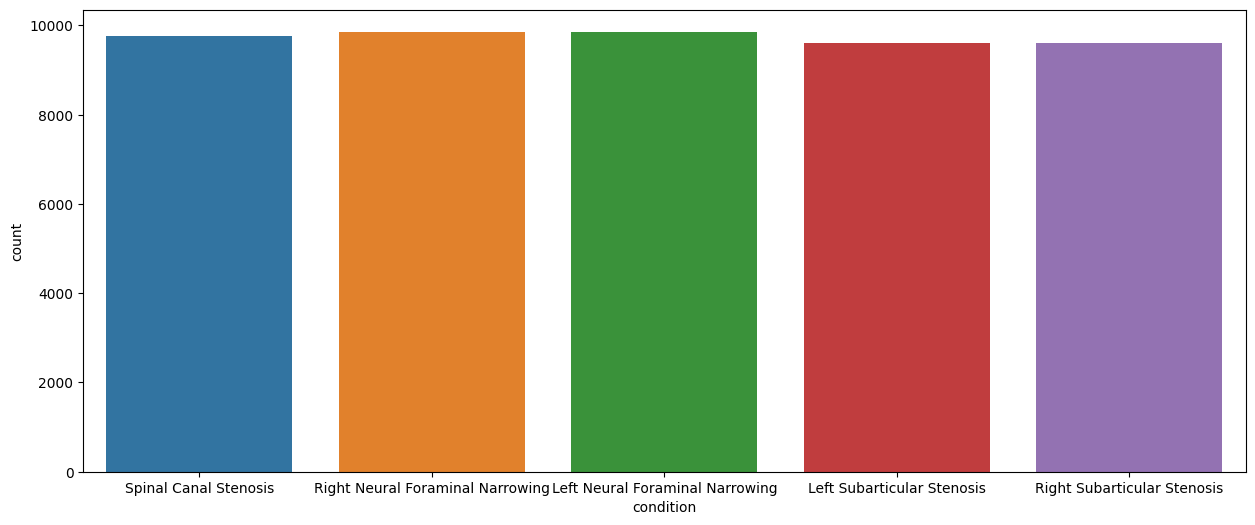

In [30]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='condition',data=df_train_2,ax=ax)

<Axes: xlabel='series_description', ylabel='count'>

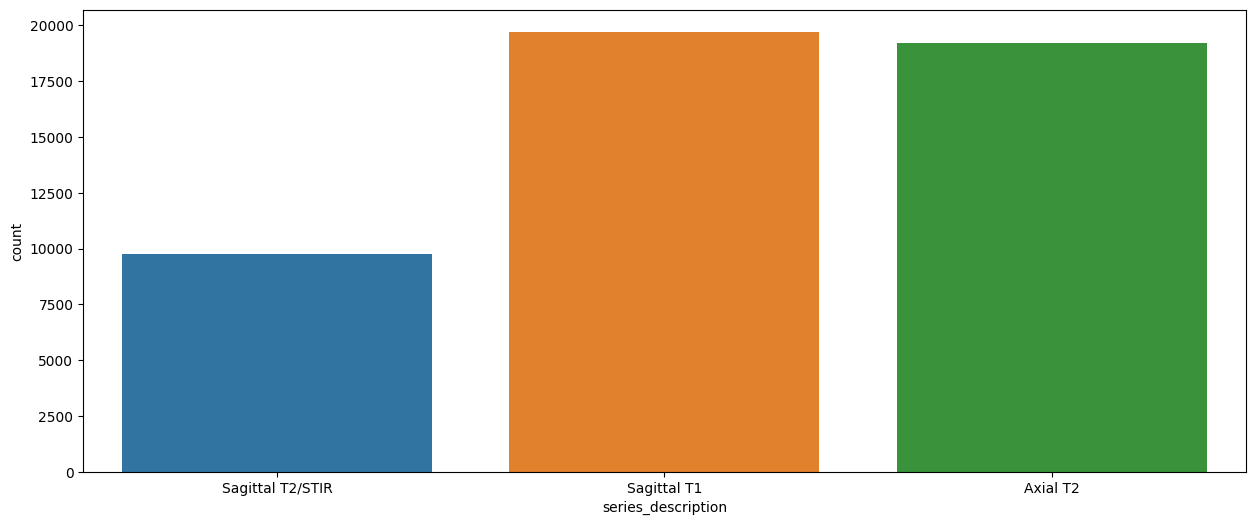

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='series_description',data=df_train_2,ax=ax)

<Axes: xlabel='level', ylabel='count'>

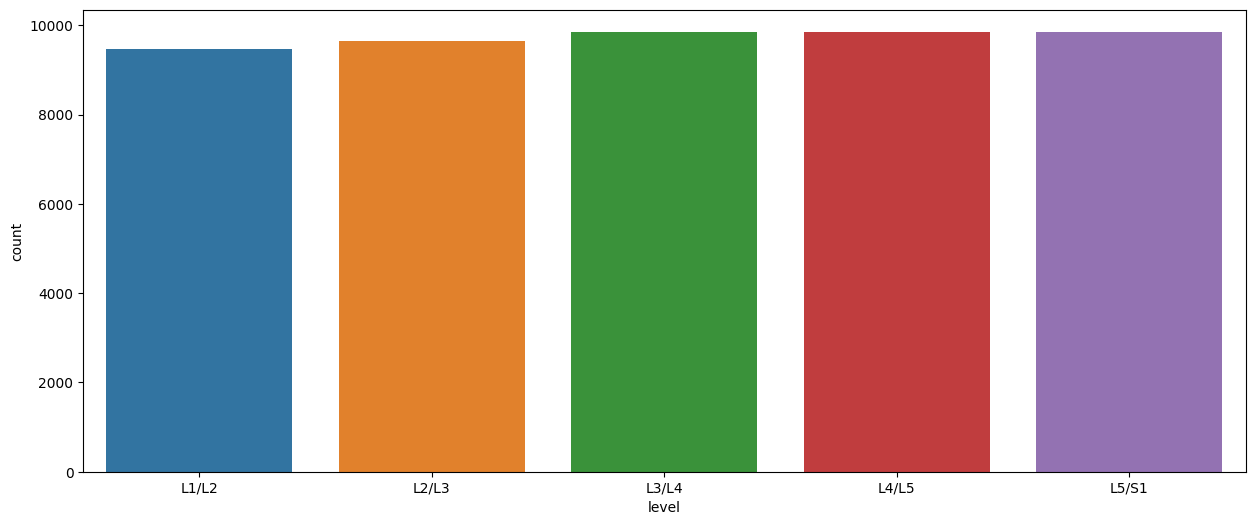

In [32]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='level',data=df_train_2,ax=ax)

In [25]:
df_train_2.isna().sum()

study_id                                  0
series_id                                 0
instance_number                           0
condition                                 0
level                                     0
x                                         0
y                                         0
spinal_canal_stenosis_l1_l2               0
spinal_canal_stenosis_l2_l3               0
spinal_canal_stenosis_l3_l4               0
spinal_canal_stenosis_l4_l5               0
spinal_canal_stenosis_l5_s1               0
left_neural_foraminal_narrowing_l1_l2     0
left_neural_foraminal_narrowing_l2_l3     0
left_neural_foraminal_narrowing_l3_l4     0
left_neural_foraminal_narrowing_l4_l5     0
left_neural_foraminal_narrowing_l5_s1     0
right_neural_foraminal_narrowing_l1_l2    0
right_neural_foraminal_narrowing_l2_l3    0
right_neural_foraminal_narrowing_l3_l4    0
right_neural_foraminal_narrowing_l4_l5    0
right_neural_foraminal_narrowing_l5_s1    0
left_subarticular_stenosis_l1_l2